# 1.1.1. Are the errors coming from specific pages?
Questions being answered in this notebook.
>- [x] ...

In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

## Loading Data from problematics regarding Errors

In [2]:
ltng_error_filtered = pd.read_csv("../../data/ELF-v4/errors/LightningError_newlogs.csv", low_memory=False)

In [3]:
ltng_error_filtered.head()

,EVENT_TYPE,TIMESTAMP,REQUEST_ID,ORGANIZATION_ID,USER_ID,CLIENT_ID,SESSION_KEY,LOGIN_KEY,USER_TYPE,APP_NAME,...,PAGE_ENTITY_TYPE,PAGE_CONTEXT,PAGE_URL,PAGE_APP_NAME,COMPONENT_NAME,TIMESTAMP_DERIVED,USER_ID_DERIVED,CLIENT_IP,ReportId,ReportType
0,LightningError,2.022063e+13,TID:2705838300000341a7,00D0b000000GaMp,0050b000004KCcn,NaN,BpZHxxMEsnzYHh14,aScjDiUXiw7NxNFR,Standard,one:one,...,LiveChatTranscript,one:recordHomeFlexipage,/lightning/r/LiveChatTranscript/5706P000001RXN...,LightningService,NaN,2022-06-28T01:14:59.497Z,0050b000004KCcnAAG,163.244.246.215,5706P000001RXN6QAO,LiveChatTranscript
1,LightningError,2.022063e+13,TID:2705838300000341a7,00D0b000000GaMp,0050b000004KCcn,NaN,BpZHxxMEsnzYHh14,aScjDiUXiw7NxNFR,Standard,one:one,...,LiveChatTranscript,one:recordHomeFlexipage,/lightning/r/LiveChatTranscript/5706P000001RXN...,LightningService,NaN,2022-06-28T01:14:59.502Z,0050b000004KCcnAAG,163.244.246.215,5706P000001RXN6QAO,LiveChatTranscript
2,LightningError,2.022063e+13,TID:2705838300000341a7,00D0b000000GaMp,0050b000004KCcn,NaN,BpZHxxMEsnzYHh14,aScjDiUXiw7NxNFR,Standard,one:one,...,LiveChatTranscript,one:recordHomeFlexipage,/lightning/r/LiveChatTranscript/5706P000001RXN...,LightningService,NaN,2022-06-28T01:14:59.504Z,0050b000004KCcnAAG,163.244.246.215,5706P000001RXN6QAO,LiveChatTranscript
3,LightningError,2.022063e+13,TID:26489164000008ad24,00D0b000000GaMp,0050b000004QTRm,NaN,PDdNaapMUYygUmnd,5CkowkBUfnh50w5r,Standard,one:one,...,LiveChatTranscript,one:recordHomeFlexipage,/lightning/r/LiveChatTranscript/5706P000000wJS...,LightningService,NaN,2022-06-28T01:15:09.829Z,0050b000004QTRmAAO,143.166.255.115,5706P000000wJSFQA2,LiveChatTranscript
4,LightningError,2.022063e+13,TID:816206330000072904,00D0b000000GaMp,0050b000004KM0q,NaN,LXICh6ym15MdDnlC,mKQ4IAkKyOElfAAV,Standard,one:one,...,Report,reports:reportBase,/lightning/r/Report/00O2R000004AmwmUAC/view?qu...,LightningService,NaN,2022-06-28T01:17:00.510Z,0050b000004KM0qAAG,137.69.117.202,00O2R000004AmwmUAC,Report


In [4]:
above_median_problematic_by_errors = pd.read_csv("../../datasets/above_median_problematic_by_errors.csv", low_memory=False)

In [5]:
above_median_problematic_by_errors

,ReportId,ErrorCount
0,00O0b000004AmRrEAK,162
1,00O0b000004keC5EAI,25
2,00O0b000006iNwdEAE,18
3,00O2R000004AmwmUAC,9
4,00O0b000004AmRjEAK,6
5,00O0b000004AnhWEAS,5
6,00O0b000004kTazEAE,3
7,00O2R000004Im5MUAS,3
8,00O0b000004AoOOEA0,3


### Loading active Reports

In [6]:
active_reports = pd.read_csv("../../datasets/active_reports.csv", low_memory=False)

In [7]:
active_reports.shape

(9479, 4)

### Merging active and problematic reports by error

In [8]:
ltng_reports = pd.merge(left=active_reports, right=ltng_error_filtered, left_on="Id", right_on="ReportId")

In [9]:
ltng_reports.shape

(245, 45)

In [10]:
list(ltng_reports.columns)

['Id',
 'Name',
 'Format',
 'LastRunDate',
 'EVENT_TYPE',
 'TIMESTAMP',
 'REQUEST_ID',
 'ORGANIZATION_ID',
 'USER_ID',
 'CLIENT_ID',
 'SESSION_KEY',
 'LOGIN_KEY',
 'USER_TYPE',
 'APP_NAME',
 'DEVICE_PLATFORM',
 'SDK_APP_VERSION',
 'OS_NAME',
 'OS_VERSION',
 'USER_AGENT',
 'BROWSER_NAME',
 'BROWSER_VERSION',
 'SDK_VERSION',
 'DEVICE_MODEL',
 'DEVICE_ID',
 'SDK_APP_TYPE',
 'CLIENT_GEO',
 'CONNECTION_TYPE',
 'UI_EVENT_ID',
 'UI_EVENT_TYPE',
 'UI_EVENT_SOURCE',
 'UI_EVENT_TIMESTAMP',
 'PAGE_START_TIME',
 'DEVICE_SESSION_ID',
 'UI_EVENT_SEQUENCE_NUM',
 'PAGE_ENTITY_ID',
 'PAGE_ENTITY_TYPE',
 'PAGE_CONTEXT',
 'PAGE_URL',
 'PAGE_APP_NAME',
 'COMPONENT_NAME',
 'TIMESTAMP_DERIVED',
 'USER_ID_DERIVED',
 'CLIENT_IP',
 'ReportId',
 'ReportType']

In [11]:
interest_columns = ['Name', 'ReportId', 'PAGE_URL', 'PAGE_CONTEXT', 'PAGE_ENTITY_TYPE', 'UI_EVENT_SOURCE', 'UI_EVENT_TYPE']

In [12]:
ltng_reports = ltng_reports[interest_columns]


In [13]:
problematics_id = list(above_median_problematic_by_errors['ReportId'])

In [14]:
ltng_reports_filtered = ltng_reports[ltng_reports['ReportId'].isin(problematics_id)]

In [15]:
ltng_reports_filtered.shape

(234, 7)

In [16]:
ltng_reports_filtered

,Name,ReportId,PAGE_URL,PAGE_CONTEXT,PAGE_ENTITY_TYPE,UI_EVENT_SOURCE,UI_EVENT_TYPE
0,S&AS Reactive Queues,00O2R000004AmwmUAC,/lightning/r/Report/00O2R000004AmwmUAC/view?qu...,reports:reportBase,Report,Error,error
1,S&AS Reactive Queues,00O2R000004AmwmUAC,/lightning/r/Report/00O2R000004AmwmUAC/view?qu...,reports:reportBase,Report,Error,error
2,S&AS Reactive Queues,00O2R000004AmwmUAC,/lightning/r/Report/00O2R000004AmwmUAC/view,reports:reportBase,Report,Error,error
3,S&AS Reactive Queues,00O2R000004AmwmUAC,/lightning/r/Report/00O2R000004AmwmUAC/view?qu...,reports:reportBase,Report,Error,error
4,S&AS Reactive Queues,00O2R000004AmwmUAC,/lightning/r/Report/00O2R000004AmwmUAC/view?qu...,reports:reportBase,Report,unknown,error
...,...,...,...,...,...,...,...
239,SLA - Average Handle Time (Sept),00O0b000004keC5EAI,/lightning/r/Report/00O0b000004keC5EAI/view?qu...,reports:reportBase,Report,Error,error
240,SLA - Average Handle Time (Sept),00O0b000004keC5EAI,/lightning/r/Report/00O0b000004keC5EAI/view?qu...,reports:reportBase,Report,Error,error
241,SLA - Average Handle Time (Sept),00O0b000004keC5EAI,/lightning/r/Report/00O0b000004keC5EAI/view?qu...,reports:reportBase,Report,Error,error
242,SLA - Average Handle Time (Sept),00O0b000004keC5EAI,/lightning/r/Report/00O0b000004keC5EAI/view?qu...,reports:reportBase,Report,Error,error


In [17]:
ltng_reports_filtered['PAGE_URL'].unique()

array(['/lightning/r/Report/00O2R000004AmwmUAC/view?queryScope=userFolders',
       '/lightning/r/Report/00O2R000004AmwmUAC/view',
       '/lightning/r/Report/00O0b000006iNwdEAE/view?queryScope=userFolders',
       '/lightning/r/Report/00O0b000006iNwdEAE/view',
       '/lightning/r/Report/00O0b000004kTazEAE/view',
       '/lightning/r/Report/00O0b000004AmRrEAK/view?queryScope=userFolders',
       '/lightning/r/Report/00O0b000004AmRrEAK/view',
       '/lightning/r/Report/00O0b000004AnhWEAS/view?queryScope=userFolders',
       '/lightning/r/Report/00O0b000004AmRjEAK/view?queryScope=userFolders%27',
       '/lightning/r/Report/00O0b000004AmRjEAK/view',
       '/lightning/r/Report/00O2R000004Im5MUAS/view?queryScope=userFolders',
       '/lightning/r/Report/00O0b000004AoOOEA0/view?queryScope=userFolders',
       '/lightning/r/Report/00O0b000004keC5EAI/view?queryScope=userFolders'],
      dtype=object)

In [18]:
ltng_reports_group = ltng_reports_filtered.groupby(['PAGE_URL', 'ReportId', 'Name']).agg({'UI_EVENT_TYPE': 'count'})

In [19]:
ltng_reports_group_sorted = ltng_reports_group.sort_values(by=['UI_EVENT_TYPE'], ascending=False)

In [20]:
ltng_reports_group_sorted.reset_index(inplace=True)

In [21]:
ltng_reports_group_sorted = ltng_reports_group_sorted.rename(columns={'UI_EVENT_TYPE': 'Error Count'})
ltng_reports_group_sorted

,PAGE_URL,ReportId,Name,Error Count
0,/lightning/r/Report/00O0b000004AmRrEAK/view?qu...,00O0b000004AmRrEAK,Chat Average Handle Time,135
1,/lightning/r/Report/00O0b000004AmRrEAK/view,00O0b000004AmRrEAK,Chat Average Handle Time,27
2,/lightning/r/Report/00O0b000004keC5EAI/view?qu...,00O0b000004keC5EAI,SLA - Average Handle Time (Sept),25
3,/lightning/r/Report/00O0b000006iNwdEAE/view?qu...,00O0b000006iNwdEAE,New Email By Team - w\o Sup filter,14
4,/lightning/r/Report/00O2R000004AmwmUAC/view?qu...,00O2R000004AmwmUAC,S&AS Reactive Queues,6
5,/lightning/r/Report/00O0b000004AmRjEAK/view,00O0b000004AmRjEAK,Agent Work for Supervisor,5
6,/lightning/r/Report/00O0b000004AnhWEAS/view?qu...,00O0b000004AnhWEAS,Average Chat Duration,5
7,/lightning/r/Report/00O0b000006iNwdEAE/view,00O0b000006iNwdEAE,New Email By Team - w\o Sup filter,4
8,/lightning/r/Report/00O0b000004AoOOEA0/view?qu...,00O0b000004AoOOEA0,Chat SLA - Wait Time,3
9,/lightning/r/Report/00O0b000004kTazEAE/view,00O0b000004kTazEAE,My Cases and Tasks,3


In [22]:
#the top 8
df2 = ltng_reports_group_sorted[:8].copy()

#others
new_row = pd.DataFrame(data = {
    'Name' : ['Other reports'],
    'ReportId': ['others'],
    'PAGE_URL': ['grouped'],
    'Error Count' : [ltng_reports_group_sorted['Error Count'][8:].sum()]
})

#combining top 8 with others
df2 = pd.concat([df2, new_row])

In [23]:
top_of_page_url = 9
list_report_name = df2['Name'].head(top_of_page_url).tolist()
list_ui_page_url = df2['PAGE_URL'].head(top_of_page_url).tolist()
list_count = df2['Error Count'].head(top_of_page_url).tolist()

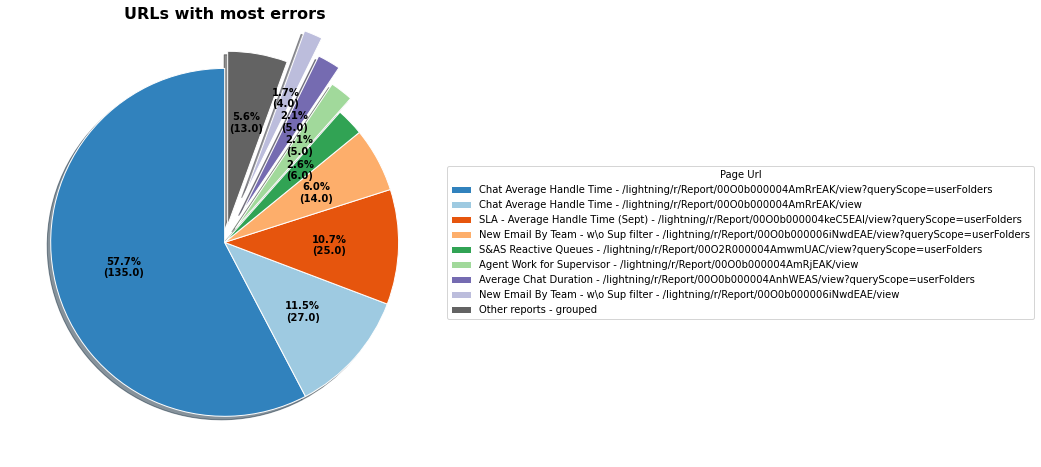

In [24]:
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.3, 0.1)
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(len(list_ui_page_url))*2)
wp = { 'linewidth' : 1, 'edgecolor' : "white" } 
labels = ['{0} - {1}'.format(i,j) for i,j in zip(list_report_name, list_ui_page_url)]

def func(pct, allvalues): 
    absolute = pct / 100.0*np.sum(allvalues) 
    return "{:.1f}%\n({:.1f})".format(pct, absolute)
fig, ax = plt.subplots(figsize =(12, 8))

wedges, texts, autotexts = ax.pie(list_count,  
                                  autopct = lambda pct: func(pct, list_count),
                                  explode = explode,
                                  shadow = True, 
                                  colors = outer_colors,
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black"))

ax.legend(wedges, labels, 
          title ="Page Url", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 10, weight ="bold") 
ax.set_title("URLs with most errors", size = 16, weight ="bold")
plt.show()